In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
# matplotlib.rcParams.update({'font.size': 1})
from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)

In [26]:
logs = {
        'AE': '/vol/biomedic3/agk21/CoSA/objects-identifiability/logs/spriteworld_4_16/enc_monolithic_dec_baseline_lambda_0/saved_models/seed_807/logs.csv',
        'SA': '/vol/biomedic3/agk21/CoSA/objects-identifiability/logs/spriteworld_4_16/enc_slot-attention_dec_spatial-broadcast_lambda_0/saved_models/seed_5270/logs.csv',
        'MONET' :'/vol/biomedic3/agk21/CoSA/objects-identifiability/logs/spriteworld_4_16/enc_monet_dec_monet_lambda_0/saved_models/seed_8573/logs.csv',
        'SA-NoA' : '/vol/biomedic3/agk21/CoSA/objects-identifiability/logs/spriteworld_4_16/enc_slot-attention_dec_simple_lambda_0/saved_models/seed_207/logs.csv',

        'EM (Ours)': '/vol/biomedic3/agk21/CoSA/objects-identifiability/logs/spriteworld_4_16/enc_slot-em_dec_spatial-broadcast_lambda_0/saved_models/seed_6107/logs.csv',
        'EM-Projected (Ours)' : '/vol/biomedic3/agk21/CoSA/objects-identifiability/logs/spriteworld_4_16/enc_slot-em-dynamic_dec_spatial-broadcast_lambda_0/saved_models/seed_1232/logs.csv',
        'EM-NoA (Ours)'  : '/vol/biomedic3/agk21/CoSA/objects-identifiability/logs/spriteworld_4_16/enc_slot-em_dec_simple_lambda_0/saved_models/seed_2254/logs.csv',
        # 'EM-CA-NA': '/vol/biomedic3/agk21/CoSA/objects-identifiability/logs/spriteworld_4_16/enc_slot-em-dynamic_dec_simple_lambda_0/saved_models/seed_8089/logs.csv',
       }

In [27]:
dfs = {key: pd.read_csv(value) for key, value in logs.items()}

In [28]:
dfs['AE']
MA_window_size = 2

<Figure size 640x480 with 0 Axes>

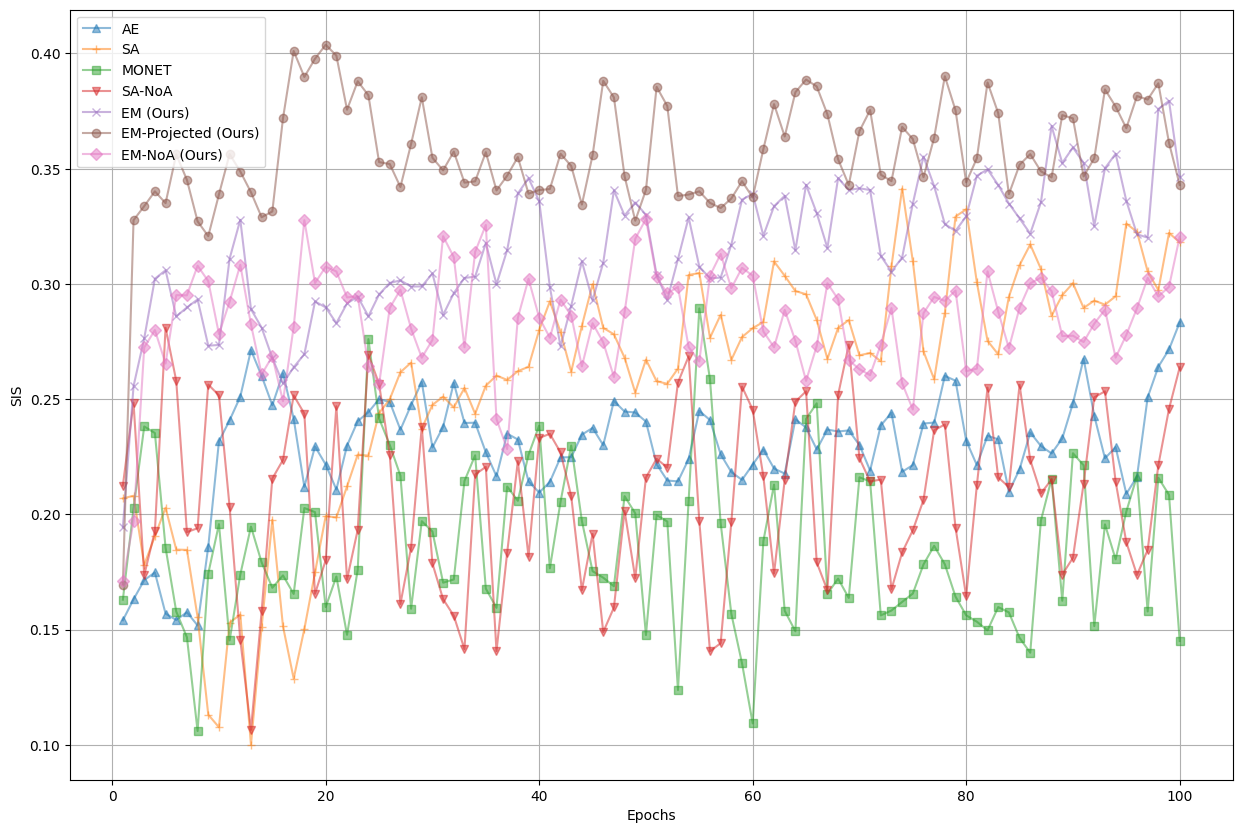

In [29]:
markers = ['^', '+', 's', 'v', 'x', 'o', 'D', '*']

sis_values = []
lens = [0]

for i, (model, df) in enumerate(dfs.items()):
    sis_values.extend(df['sis'].values)
    lens.append(len(sis_values))


sis_values = np.array(sis_values)
colors = sis_values

plt.clf()
plt.figure(figsize=(15, 10))

for i, (model, df) in enumerate(dfs.items()):
    plt.plot((np.abs(np.min(sis_values)) + df['sis']).rolling(window=MA_window_size).mean(),
                marker = markers[i], 
                label = model,
                alpha = 0.5
                )


plt.grid()
plt.legend(loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('SIS')

plt.savefig(f"SIS_Epochs.pdf", bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

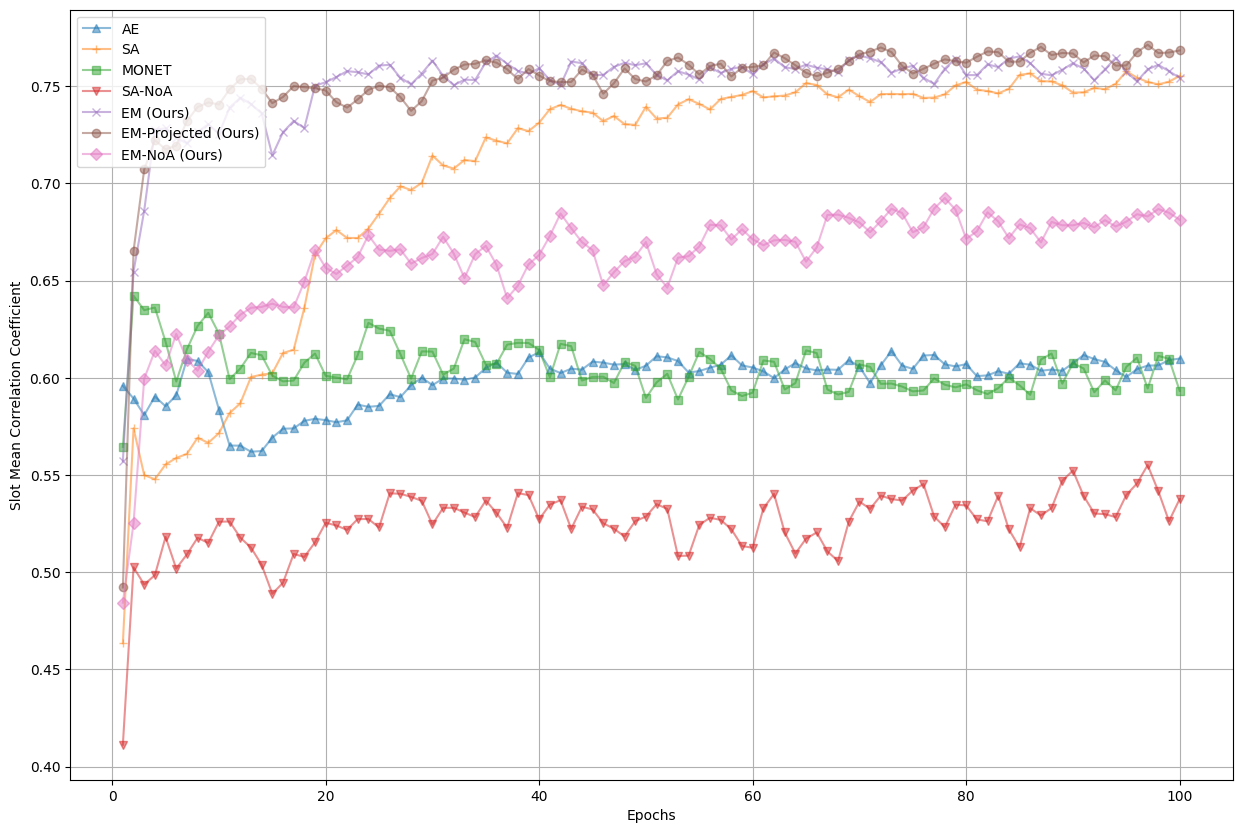

In [30]:
markers = ['^', '+', 's', 'v', 'x', 'o', 'D', '*']

sis_values = []
lens = [0]

for i, (model, df) in enumerate(dfs.items()):
    sis_values.extend(df['smcc_reg'].values)
    lens.append(len(sis_values))


sis_values = np.array(sis_values)
# sis_values += np.min(sis_values)
colors = sis_values

plt.clf()
plt.figure(figsize=(15, 10))

for i, (model, df) in enumerate(dfs.items()):
    plt.plot(df['smcc_reg'].rolling(window=MA_window_size).mean(),
                marker = markers[i], 
                label = model,
                alpha = 0.5
                )


plt.grid()
plt.legend(loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Slot Mean Correlation Coefficient')
# plt.ylim(0, 1.0)


plt.savefig(f"SMCC_Epochs.pdf", bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

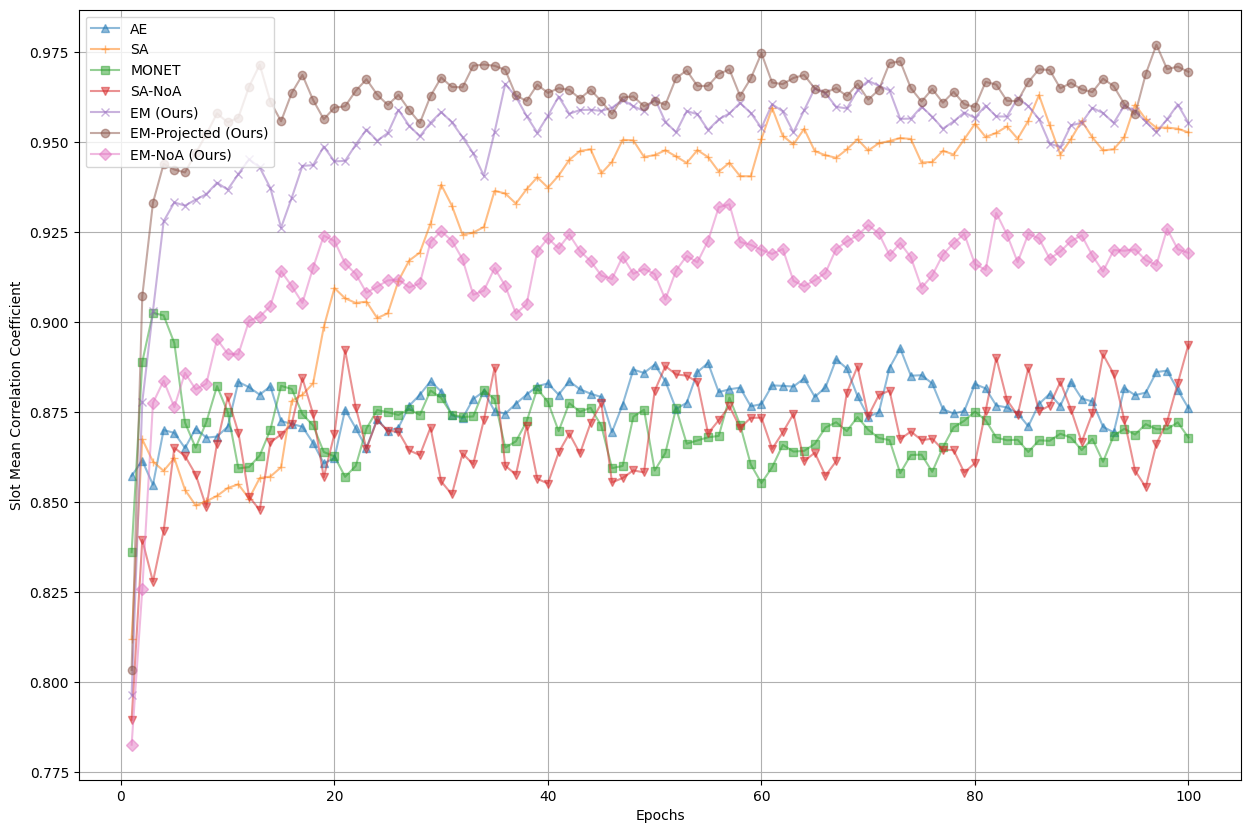

In [31]:
markers = ['^', '+', 's', 'v', 'x', 'o', 'D']

sis_values = []
lens = [0]

for i, (model, df) in enumerate(dfs.items()):
    sis_values.extend(df['smcc_aff'].values)
    lens.append(len(sis_values))


sis_values = np.array(sis_values)
# sis_values += np.min(sis_values)
colors = sis_values

plt.clf()
plt.figure(figsize=(15, 10))

for i, (model, df) in enumerate(dfs.items()):
    plt.plot(df['smcc_aff'].rolling(window=MA_window_size).mean(),
                marker = markers[i], 
                label = model,
                alpha = 0.5
                )


plt.grid()
plt.legend(loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Slot Mean Correlation Coefficient')
# plt.ylim(0, 1.0)


plt.savefig(f"SMCC_affine_Epochs.pdf", bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

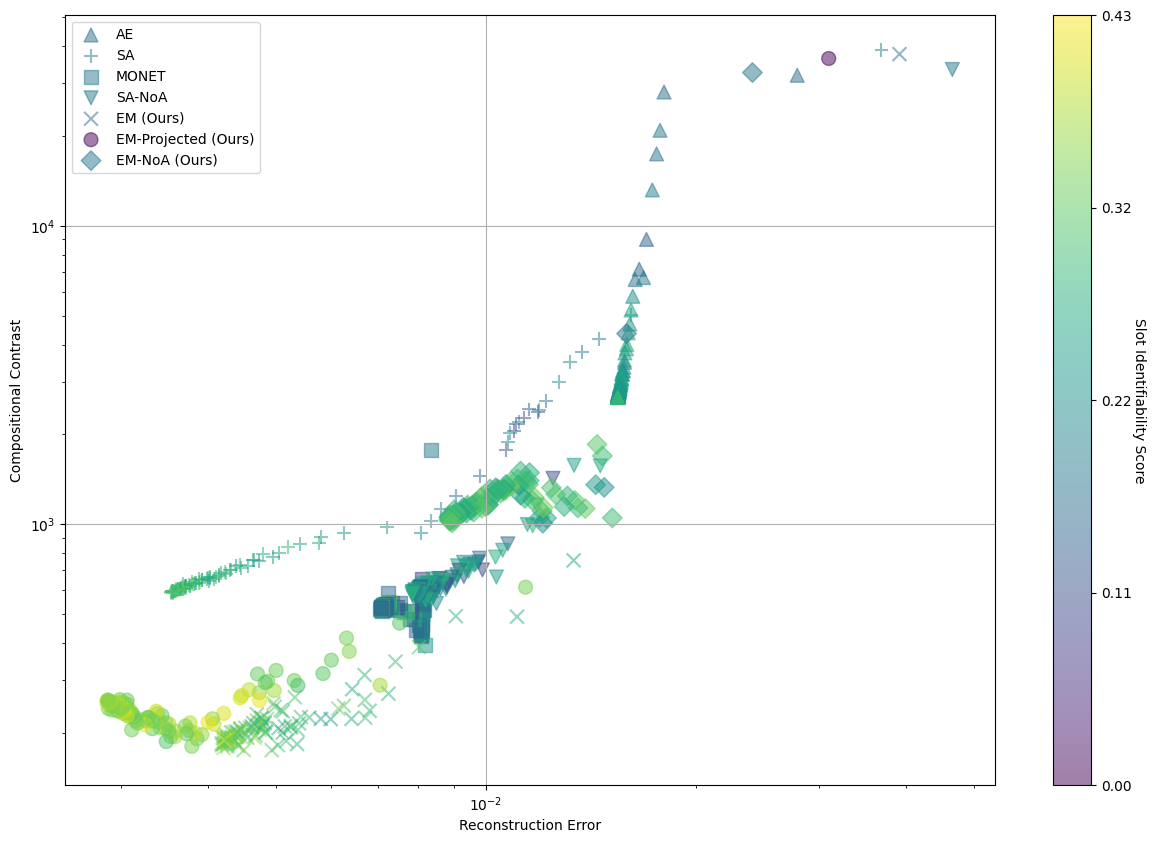

In [32]:
markers = ['^', '+', 's', 'v', 'x', 'o', 'D', '*']

sis_values = []
lens = [0]

for i, (model, df) in enumerate(dfs.items()):
    sis_values.extend(df['sis'][df['recon'] < 0.05].values)
    lens.append(len(sis_values))


sis_values = np.array(sis_values)
sis_values += np.abs(np.min(sis_values))
colors = sis_values

plt.clf()
plt.figure(figsize=(15, 10))

for i, (model, df) in enumerate(dfs.items()):
    # print(i, model, np.max(colors[lens[i]:lens[i+1]]), np.min(colors[lens[i]:lens[i+1]]))
    plt.scatter(df['recon'][df['recon'] < 0.05].values,
                df['cci'][df['recon'] < 0.05].values,
                marker = markers[i], 
                label = model,
                c = colors[lens[i]:lens[i+1]], 
                s = 100,
                alpha = 0.5,
                vmin=np.min(sis_values), 
                vmax=np.max(sis_values),
                )
    plt.xscale('log')
    plt.yscale('log')


v = np.linspace(np.min(sis_values), np.max(sis_values), 5, endpoint=True)
cbar = plt.colorbar(format='%.2f')
cbar.set_ticks(v)
cbar.set_label('Slot Identifiability Score', rotation=270, labelpad=10)

plt.grid()
leg = plt.legend(loc='upper left')    
plt.xlabel('Reconstruction Error')
plt.ylabel('Compositional Contrast')
plt.savefig(f"SIS.pdf", bbox_inches='tight')

[0.32900265 0.44016245 0.55132225 0.66248206 0.77364186]


<Figure size 640x480 with 0 Axes>

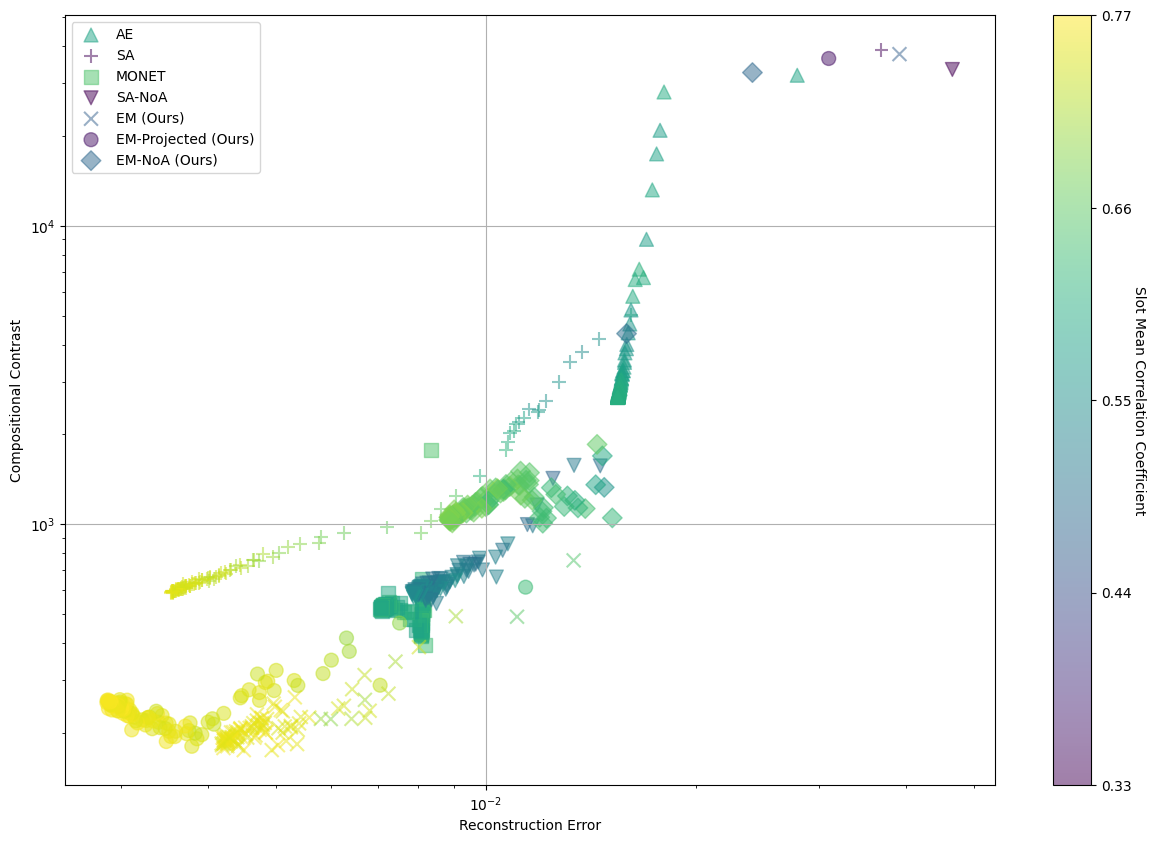

In [33]:
markers = ['^', '+', 's', 'v', 'x', 'o', 'D']

sis_values = []
lens = [0]

for i, (model, df) in enumerate(dfs.items()):
    sis_values.extend(df['smcc_reg'][df['recon'] < 0.05].values)
    lens.append(len(sis_values))


sis_values = np.array(sis_values)
# sis_values += np.min(sis_values)
colors = sis_values

plt.clf()
plt.figure(figsize=(15, 10))

for i, (model, df) in enumerate(dfs.items()):
    plt.scatter(df['recon'][df['recon'] < 0.05].values,
                df['cci'][df['recon'] < 0.05].values,
                marker = markers[i], 
                label = model,
                c = colors[lens[i]:lens[i+1]], 
                s = 100,
                alpha = 0.5,
                vmin=np.min(sis_values), 
                vmax=np.max(sis_values),
                )
    plt.xscale('log')
    plt.yscale('log')


v = np.linspace(np.min(sis_values), np.max(sis_values), 5, endpoint=True)
print(v)
cbar = plt.colorbar(format='%.2f')
cbar.set_ticks(v)
cbar.set_label('Slot Mean Correlation Coefficient', rotation=270, labelpad=10)

plt.grid()
plt.legend(loc='upper left')
plt.xlabel('Reconstruction Error')
plt.ylabel('Compositional Contrast')
plt.savefig(f"SMCC.pdf", bbox_inches='tight')

[0.72251165 0.78687835 0.85124505 0.91561175 0.97997845]


<Figure size 640x480 with 0 Axes>

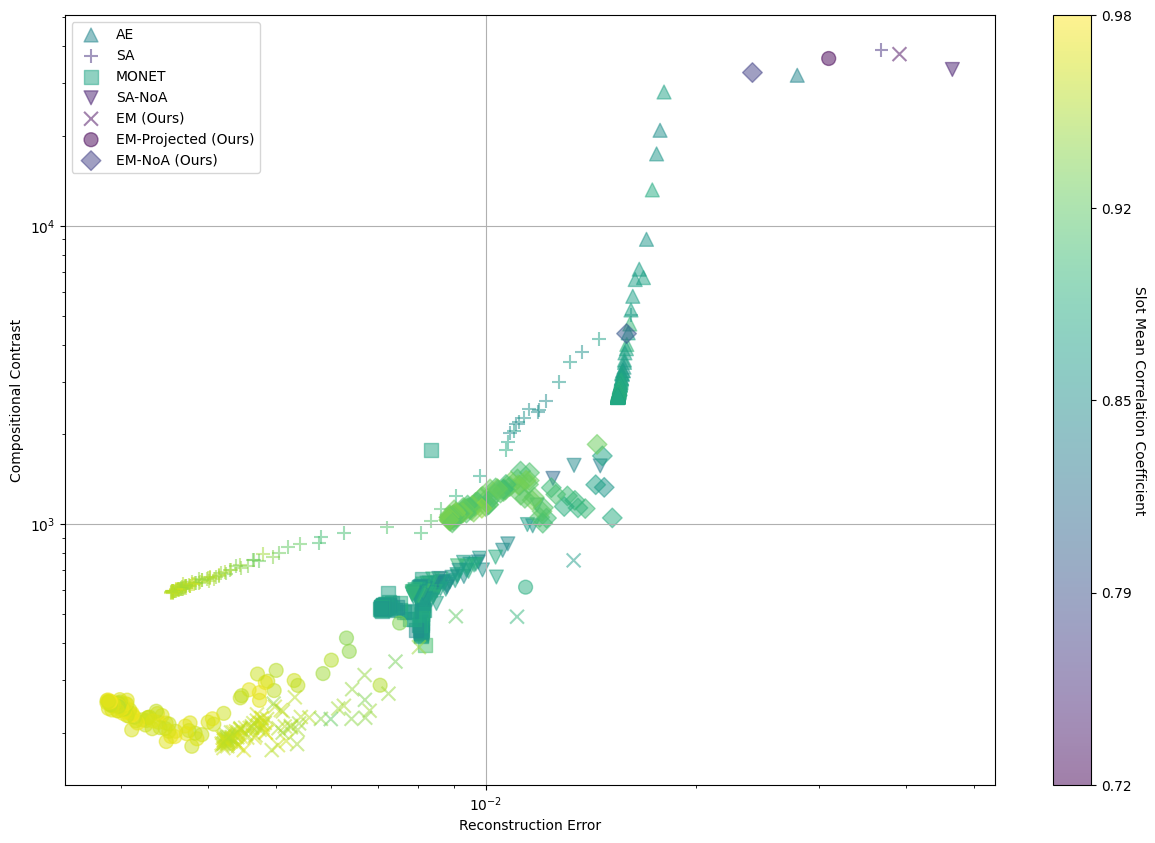

In [34]:
markers = ['^', '+', 's', 'v', 'x', 'o', 'D']

sis_values = []
lens = [0]

for i, (model, df) in enumerate(dfs.items()):
    sis_values.extend(df['smcc_aff'][df['recon'] < 0.05].values)
    lens.append(len(sis_values))


sis_values = np.array(sis_values)
# sis_values += np.min(sis_values)
colors = sis_values

plt.clf()
plt.figure(figsize=(15, 10))

for i, (model, df) in enumerate(dfs.items()):
    plt.scatter(df['recon'][df['recon'] < 0.05].values,
                df['cci'][df['recon'] < 0.05].values,
                marker = markers[i], 
                label = model,
                c = colors[lens[i]:lens[i+1]], 
                s = 100,
                alpha = 0.5,
                vmin=np.min(sis_values), 
                vmax=np.max(sis_values),
                )
    plt.xscale('log')
    plt.yscale('log')


v = np.linspace(np.min(sis_values), np.max(sis_values), 5, endpoint=True)
print(v)
cbar = plt.colorbar(format='%.2f')
cbar.set_ticks(v)
cbar.set_label('Slot Mean Correlation Coefficient', rotation=270, labelpad=10)

plt.grid()
plt.legend(loc='upper left')
plt.xlabel('Reconstruction Error')
plt.ylabel('Compositional Contrast')
plt.savefig(f"AffineSMCC.pdf", bbox_inches='tight')

In [8]:
dfs['AE']['sis'].values

array([ 0.01572414,  0.01266369,  0.033875  ,  0.02937914,  0.04048364,
       -0.00631573,  0.03497372,  0.00038577,  0.02353123,  0.06875259,
        0.11479721,  0.08715095,  0.1352658 ,  0.12758908,  0.11283642,
        0.10215709,  0.1405369 ,  0.06286297,  0.08132922,  0.09788179,
        0.06563403,  0.0762371 ,  0.10372599,  0.09740517,  0.11154996,
        0.10873102,  0.10915964,  0.08460094,  0.1305377 ,  0.10465298,
        0.07373331,  0.1225599 ,  0.11193166,  0.08765503,  0.11217788,
        0.06201245,  0.09134905,  0.09903642,  0.08621645,  0.06270651,
        0.07652992,  0.07190988,  0.09785559,  0.07203074,  0.11742222,
        0.07789362,  0.10242485,  0.11634709,  0.09313418,  0.11558897,
        0.08522567,  0.07859111,  0.07106826,  0.07782171,  0.09045718,
        0.11961965,  0.08253868,  0.08987509,  0.0671188 ,  0.08310242,
        0.08037714,  0.09612405,  0.0639413 ,  0.09175756,  0.11100709,
        0.08468474,  0.09195561,  0.1019361 ,  0.09025386,  0.10